#**Demo- Customer Churn Prediction**
#**Scenario**

A telecom company wants to predict whether a customer will churn (leave the service) or stay based on their usage patterns, complaints, contract type, and other factors.

##**Objectives**
Build a classification model to predict customer churn (Binary Classification: Churn = Yes/No).

* Compare different classification algorithms (Logistic Regression, Decision Tree, Random Forest, SVM, Neural Networks, etc.).

* Evaluate model performance using accuracy, precision, recall, F1-score, and AUC-ROC.

* Add a Predicted_Churn column using the best-performing model and visualize actual vs. predicted churn counts with a bar chart.


##Step 1: Importing Necessary Libraries and Data Loading



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder # Import LabelEncoder here
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('customer_churn_dataset.csv')

## Step 2: Data Preprocessing
Convert categorical variables to numerical format, as machine learning models work with numbers.


In [3]:
# Convert categorical columns like 'Complaints', 'TechSupport', and 'ContractType' to numeric using LabelEncoder
label_encoder = LabelEncoder()

In [4]:
# Apply label encoding to 'Complaints' and 'TechSupport' (binary columns)
df['Complaints'] = label_encoder.fit_transform(df['Complaints'])
df['TechSupport'] = label_encoder.fit_transform(df['TechSupport'])

In [5]:
# For 'ContractType', we'll use one-hot encoding (since it has more than two categories)
df = pd.get_dummies(df, columns=['ContractType'], drop_first=True)

## Step 3: Feature Scaling & Train-Test Split

To ensure fair learning, we standardize numerical features and split the data into training and testing sets—this helps prevent overfitting.

In [6]:
# Split features and target
X = df.drop(columns=['CustomerID', 'Churn'])
y = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Yes'/'No' to 1/0

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 4: Model Implementation

Time to put machine learning to work! We train five models—Logistic Regression, Decision Tree, Random Forest, SVM, and KNN—to predict customer churn.

In [9]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Classification Report for {model.__class__.__name__}:\n")
    print(classification_report(y_test, y_pred))

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}\n")

* Accuracy: Measures the percentage of correct predictions, but may not be reliable in imbalanced datasets.

* Precision: Important when false positives need to be minimized (e.g., avoiding false churn alerts).

* Recall: Crucial when false negatives are costly (e.g., missing actual churners).

* F1-Score: A balance between precision and recall, useful for overall performance.

* ROC-AUC Score: Measures the model’s ability to distinguish between classes, important for churn detection.

In [10]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
print("Logistic Regression Results:")
evaluate_model(log_reg, X_train, X_test, y_train, y_test)

Logistic Regression Results:
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         5

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

Accuracy: 0.5833
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.6286



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa

In [11]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
print("Decision Tree Results:")
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

Decision Tree Results:
Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.60      0.75         5

    accuracy                           0.83        12
   macro avg       0.89      0.80      0.81        12
weighted avg       0.87      0.83      0.82        12

Accuracy: 0.8333
Precision: 1.0000
Recall: 0.6000
F1-Score: 0.7500
ROC-AUC: 0.8000



In [12]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
print("Random Forest Results:")
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

Random Forest Results:
Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.75      0.60      0.67         5

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12

Accuracy: 0.7500
Precision: 0.7500
Recall: 0.6000
F1-Score: 0.6667
ROC-AUC: 0.7429



In [13]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
print("K-Nearest Neighbors Results:")
evaluate_model(knn_model, X_train, X_test, y_train, y_test)

K-Nearest Neighbors Results:
Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.50      0.20      0.29         5

    accuracy                           0.58        12
   macro avg       0.55      0.53      0.50        12
weighted avg       0.56      0.58      0.53        12

Accuracy: 0.5833
Precision: 0.5000
Recall: 0.2000
F1-Score: 0.2857
ROC-AUC: 0.4857



In [14]:
# Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
print("Support Vector Machine Results:")
evaluate_model(svm_model, X_train, X_test, y_train, y_test)

Support Vector Machine Results:
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.20      0.33         5

    accuracy                           0.67        12
   macro avg       0.82      0.60      0.56        12
weighted avg       0.79      0.67      0.59        12

Accuracy: 0.6667
Precision: 1.0000
Recall: 0.2000
F1-Score: 0.3333
ROC-AUC: 0.3429



## Step 5: Hyperparameter Tuning
Because default settings aren’t always the best, we fine-tune our models using Grid Search and Randomized Search to squeeze out maximum performance.

In [15]:
# Hyperparameter Tuning with Randomized Search (Logistic Regression)
param_dist_log_reg = {
    'C': np.logspace(-3, 3, 7),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
random_search_log_reg = RandomizedSearchCV(log_reg, param_dist_log_reg, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1)
random_search_log_reg.fit(X_train, y_train)
print("Best Parameters from Random Search for Logistic Regression:")
print(random_search_log_reg.best_params_)

Best Parameters from Random Search for Logistic Regression:
{'solver': 'liblinear', 'penalty': 'l1', 'C': np.float64(0.01)}


In [16]:
# Hyperparameter Tuning with Grid Search (Decision Tree)
param_grid_dt = {
    'max_depth': [5, 10, 20, None],  # Depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at leaf node
    'criterion': ['gini', 'entropy']  # Splitting criterion
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print("Best Parameters from Grid Search for Decision Tree:")
print(grid_search_dt.best_params_)

Best Parameters from Grid Search for Decision Tree:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [17]:
# Hyperparameter Tuning with Grid Search (Random Forest)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print("Best Parameters from Grid Search for Random Forest:")
print(grid_search_rf.best_params_)

Best Parameters from Grid Search for Random Forest:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
# Hyperparameter Tuning with Grid Search (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’ and ‘poly’
}

grid_search_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print("Best Parameters from Grid Search for SVM:")
print(grid_search_svm.best_params_)

Best Parameters from Grid Search for SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}


In [19]:
# Hyperparameter Tuning with Grid Search (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)
print("Best Parameters from Grid Search for KNN:")
print(grid_search_knn.best_params_)

Best Parameters from Grid Search for KNN:
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


## Step 6: Best Model Selection

Finally, we compare all the models, rank them based on their scores, and crown the best one for predicting customer churn—because only the best should go into production!Evaluating each bestfit model

In [20]:
# Evaluate the best Logistic Regression model from Random Search
best_log_reg = random_search_log_reg.best_estimator_
print("Best Logistic Regression Results (after Random Search):")
evaluate_model(best_log_reg, X_train, X_test, y_train, y_test)

Best Logistic Regression Results (after Random Search):
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         5

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

Accuracy: 0.5833
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.5000



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa

In [21]:
# Evaluate the best Decision Tree model from Grid Search
best_dt = grid_search_dt.best_estimator_
print("Best Decision Tree Results (after Grid Search):")
evaluate_model(best_dt, X_train, X_test, y_train, y_test)

Best Decision Tree Results (after Grid Search):
Classification Report for DecisionTreeClassifier:

              precision    recall  f1-score   support

           0       0.58      1.00      0.74         7
           1       0.00      0.00      0.00         5

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12

Accuracy: 0.5833
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
ROC-AUC: 0.4429



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-pa

In [22]:
# Evaluate the best Random Forest model from Grid Search
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Results (after Grid Search):")
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

Best Random Forest Results (after Grid Search):
Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.75      0.60      0.67         5

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12

Accuracy: 0.7500
Precision: 0.7500
Recall: 0.6000
F1-Score: 0.6667
ROC-AUC: 0.7429



In [23]:
# Evaluate the best SVM model from Grid Search
best_svm = grid_search_svm.best_estimator_
print("Best SVM Results (after Grid Search):")
evaluate_model(best_svm, X_train, X_test, y_train, y_test)

Best SVM Results (after Grid Search):
Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.60      0.86      0.71         7
           1       0.50      0.20      0.29         5

    accuracy                           0.58        12
   macro avg       0.55      0.53      0.50        12
weighted avg       0.56      0.58      0.53        12

Accuracy: 0.5833
Precision: 0.5000
Recall: 0.2000
F1-Score: 0.2857
ROC-AUC: 0.6286



In [24]:
# Evaluate the best KNN model from Grid Search
best_knn = grid_search_knn.best_estimator_
print("Best KNN Results (after Grid Search):")
evaluate_model(best_knn, X_train, X_test, y_train, y_test)

Best KNN Results (after Grid Search):
Classification Report for KNeighborsClassifier:

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.75      0.60      0.67         5

    accuracy                           0.75        12
   macro avg       0.75      0.73      0.73        12
weighted avg       0.75      0.75      0.74        12

Accuracy: 0.7500
Precision: 0.7500
Recall: 0.6000
F1-Score: 0.6667
ROC-AUC: 0.8143



In [25]:
# Create a list of models to compare
models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': dt_model,
    'Random Forest': best_rf,
    'KNN': best_knn,
    'SVM': svm_model  # or best_svm if you tune it later
}

# Compare metrics
comparison_results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    result = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'
    }
    comparison_results.append(result)

# Convert to DataFrame
comparison_df = pd.DataFrame(comparison_results)
print("Model Comparison Summary:")
display(comparison_df.sort_values(by='F1 Score', ascending=False))


/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Comparison Summary:


,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
1,Decision Tree,0.833333,1.00,0.6,0.750000,0.800000
2,Random Forest,0.750000,0.75,0.6,0.666667,0.742857
3,KNN,0.750000,0.75,0.6,0.666667,0.814286
4,SVM,0.666667,1.00,0.2,0.333333,0.342857
0,Logistic Regression,0.583333,0.00,0.0,0.000000,0.500000


## Step 7: Performance Evaluation

Let’s see how well our models perform! We check confusion matrices, and ROC-AUC to find the strongest contender.

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_conf_matrix_and_roc(model, X_test, y_test, model_name):
    # Confusion Matrix
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'{model_name} - ROC Curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid()
        plt.show()


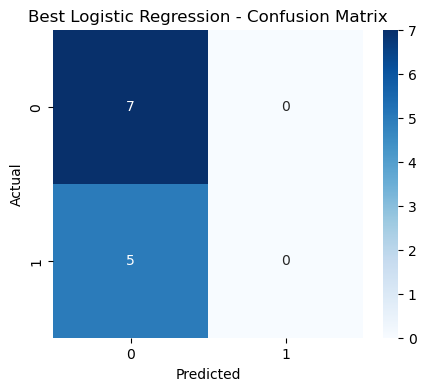

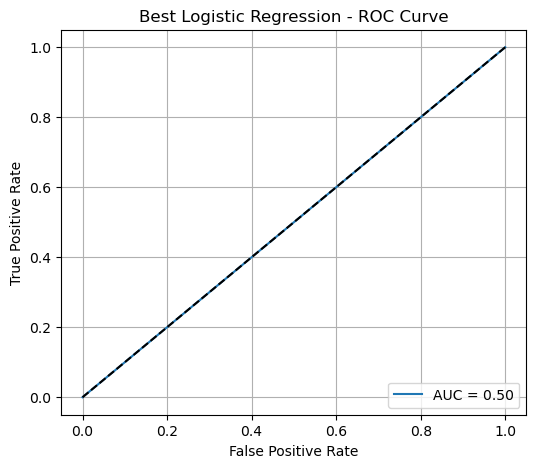

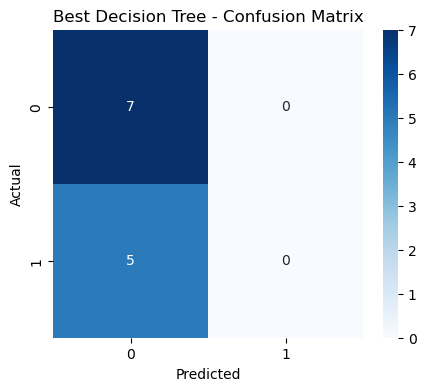

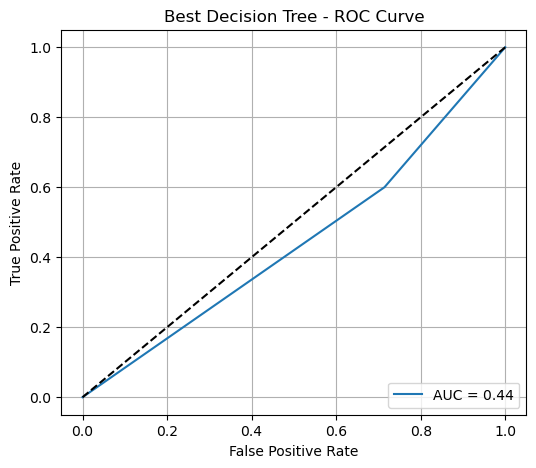

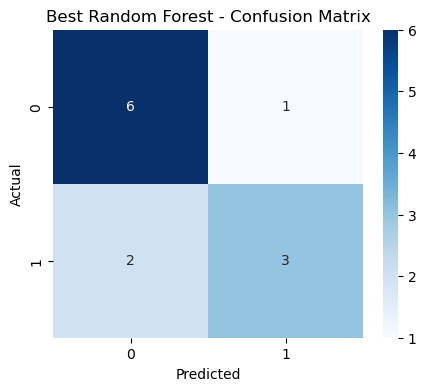

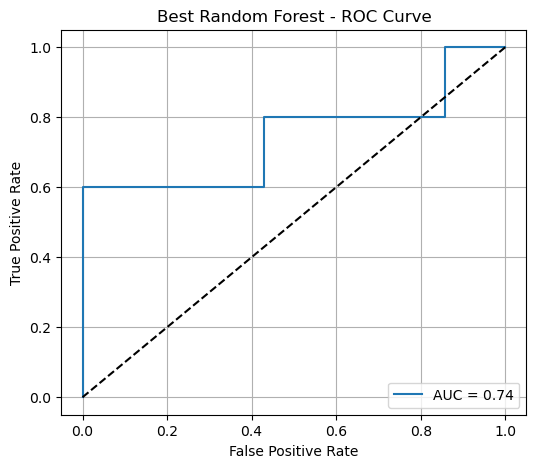

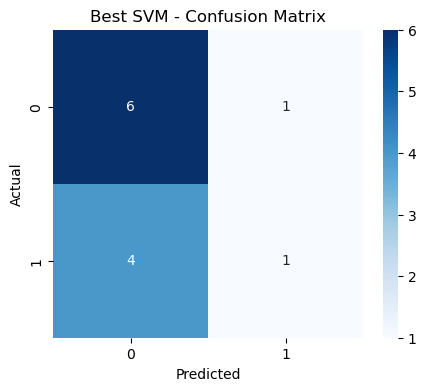

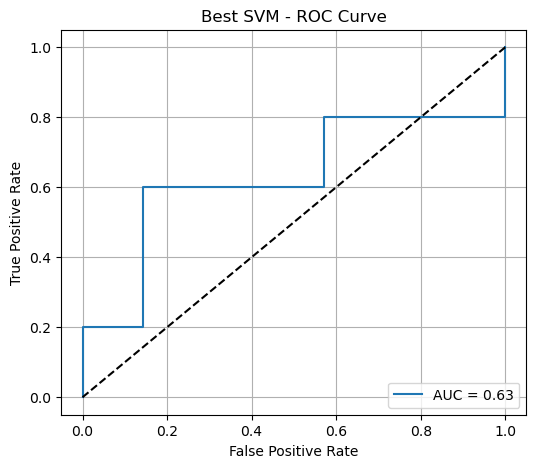

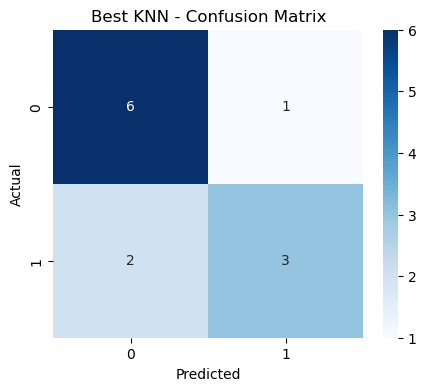

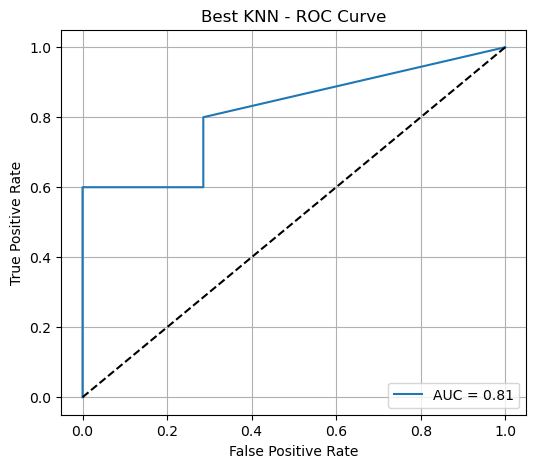

In [27]:
plot_conf_matrix_and_roc(best_log_reg, X_test, y_test, "Best Logistic Regression")
plot_conf_matrix_and_roc(best_dt, X_test, y_test, "Best Decision Tree")
plot_conf_matrix_and_roc(best_rf, X_test, y_test, "Best Random Forest")
plot_conf_matrix_and_roc(best_svm, X_test, y_test, "Best SVM")
plot_conf_matrix_and_roc(best_knn, X_test, y_test, "Best KNN")

In [28]:
# Compare all models and select the best
model_scores = {
    "Logistic Regression": accuracy_score(y_test, best_log_reg.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, best_dt.predict(X_test)),
    "Random Forest": accuracy_score(y_test, best_rf.predict(X_test)),
    "KNN": accuracy_score(y_test, best_knn.predict(X_test)),
    "SVM": accuracy_score(y_test, best_svm.predict(X_test))
}

best_model_name = max(model_scores, key=model_scores.get)
print(f"The best model is: {best_model_name} with Accuracy: {model_scores[best_model_name]:.4f}")

The best model is: Random Forest with Accuracy: 0.7500


## Step 8: Predicted Churn Column and Comparison Graph
Add a column Predicted_Churn to the dataset using the best-performing model and plot a bar chart comparing actual vs. predicted churn counts.

In [29]:
# Use the best-performing model (replace 'best_model' with your actual best model)
best_model = best_rf  # Assuming Random Forest performed best; replace if needed

# Make predictions on the entire dataset
df['Predicted_Churn'] = best_model.predict(X)

# Convert numeric predictions back to 'Yes'/'No' for readability
df['Predicted_Churn'] = df['Predicted_Churn'].apply(lambda x: 'Yes' if x == 1 else 'No')

# Save the updated dataset with predictions
df.to_csv('customer_churn_predictions.csv', index=False)
print("Updated dataset with predicted churn saved as 'customer_churn_predictions.csv'.")

Updated dataset with predicted churn saved as 'customer_churn_predictions.csv'.


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


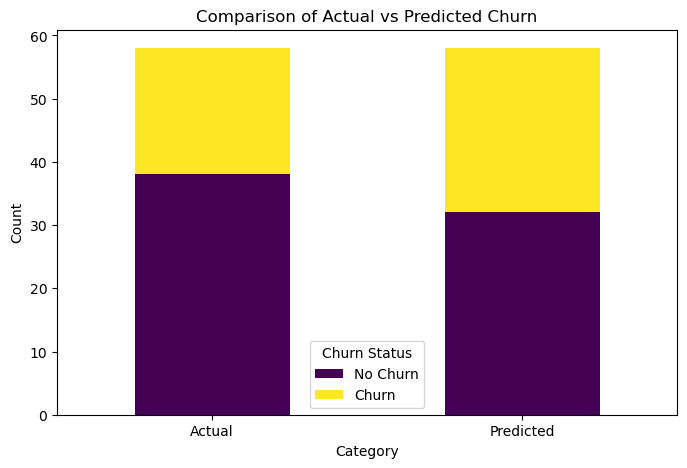

In [30]:
# Count actual and predicted churn values
actual_counts = df['Churn'].value_counts()
predicted_counts = df['Predicted_Churn'].value_counts()

# Combine into a DataFrame
churn_comparison = pd.DataFrame({'Actual': actual_counts, 'Predicted': predicted_counts}).T

# Stacked Bar Chart
churn_comparison.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')

plt.title('Comparison of Actual vs Predicted Churn')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Churn Status', labels=['No Churn', 'Churn'])
plt.show()